# AlpesHearth

## Caso de estudio AlpesHearth

**Laboratorio 1 — Exploración, preparación y regresión lineal (ISIS2611)**

El presente notebook se basa en el caso de estudio AlpesHearth, el cual tiene como objetivos:
- Aplicar técnicas de regresión para construir un modelo predictivo que permita estimar el riesgo cardiovascular de una persona siguiendo el ciclo de machine learning.
- Determinar los principales factores de riesgo cardiovascular con base en los datos.
- Aplicar y comprender un modelo de regresión lineal.
- Reconocer posibles sesgos del modelo de aprendizaje de máquina.
- Comunicar de forma clara y sintética los resultados obtenidos.

**Librerías utilizadas:** Pandas, NumPy, Scikit-Learn (Pipeline, ColumnTransformer, LinearRegression), Statsmodels, Matplotlib, Seaborn

### Instalación de librerías

In [97]:
%pip install pandas numpy matplotlib seaborn ipython scikit-learn statsmodels 


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Importación de librerías

In [98]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro


In [99]:
from importlib.metadata import version
print(f"Versión de Pandas: {version('pandas')}")
print(f"Versión de Numpy: {version('numpy')}")
print(f"Versión de Matplotlib: {version('matplotlib')}")
print(f"Versión de Seaborn: {version('seaborn')}")

Versión de Pandas: 2.3.3
Versión de Numpy: 2.2.6
Versión de Matplotlib: 3.10.8
Versión de Seaborn: 0.13.2


## 1. Exploración de los Datos (EDA)

In [100]:
datos_model = pd.read_csv('./Datos/Datos Lab 1.csv')

In [101]:
data = datos_model.copy()

In [102]:
data.head()

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,...,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,...,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,WjVn1699,2021-05-27,F,NaN,73.400,1.650,27.000,78.100,90/74,135.0,...,High,N,165.000,0.473,90.0,74.0,Normal,45.0,12.600,LOW
3,dCDO1109,"April 18, 2022",F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,...,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,01/11/2024,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,...,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH


### 1.1 Primeras observaciones

Se observan columnas con datos repetidos y/o muy parecidos. Por ejemplo, `Height (m)` y `Height (cm)`, `Waist-to-Height Ratio` y `Abdominal Circumference`, `BMI` y `Weight/Height`, etc.

Será necesario identificar cuáles de estas variables son redundantes. Para las dos columnas de estatura, se deberá verificar si coinciden y, de no hacerlo, calcular un promedio.

In [103]:
display(data.sample(5))

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
716,ZGBy9927,2022-06-21,M,35.0,118.400,1.76,38.200,74.400,96/71,162.0,...,High,N,176.000,0.423,96.0,71.0,Normal,100.0,17.680,HIGH
542,DPlz7458,"February 27, 2022",F,42.0,107.600,1.87,30.800,97.800,108/64,176.0,...,Low,N,187.000,0.523,108.0,64.0,Normal,73.0,15.080,INTERMEDIARY
1316,MHmw6712,2025-10-20,M,48.0,117.800,1.85,34.400,93.300,110/76,141.0,...,Low,N,185.000,0.504,NaN,76.0,Normal,NaN,15.200,INTERMEDIARY
698,zpEJ0975,"January 01, 2023",F,40.0,115.200,1.66,41.800,75.200,119/72,300.0,...,Moderate,Y,166.000,0.453,119.0,72.0,Normal,230.0,-20.057,INTERMEDIARY
783,bCoz6266,11-12-2024,F,49.0,100.234,1.52,30.732,115.409,97/96,127.0,...,Moderate,Y,151.965,0.759,97.0,96.0,Hypertension Stage 2,36.0,13.536,HIGH


In [104]:
data.shape

(1639, 24)

El conjunto de datos está compuesto por 1.639 registros (filas) y 24 variables (columnas).

In [105]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient ID                    1639 non-null   object 
 1   Date of Service               1639 non-null   object 
 2   Sex                           1639 non-null   object 
 3   Age                           1571 non-null   float64
 4   Weight (kg)                   1566 non-null   float64
 5   Height (m)                    1578 non-null   float64
 6   BMI                           1586 non-null   float64
 7   Abdominal Circumference (cm)  1578 non-null   float64
 8   Blood Pressure (mmHg)         1639 non-null   object 
 9   Total Cholesterol (mg/dL)     1571 non-null   float64
 10  HDL (mg/dL)                   1557 non-null   float64
 11  Fasting Blood Sugar (mg/dL)   1585 non-null   float64
 12  Smoking Status                1639 non-null   object 
 13  Dia

### 1.2 Estructura del dataset

Se observa el detalle de cada columna: nombre, número de valores no nulos y tipo de dato.

- **Columnas categóricas** (object): `Patient ID`, `Date of Service`, `Sex`, `Blood Pressure (mmHg)`, `Smoking Status`, `Diabetes Status`, `Physical Activity Level`, `Family History of CVD`, `Blood Pressure Category`.
- **Columna `Blood Pressure (mmHg)`** contiene formato `Systolic/Diastolic`, derivable de las columnas numéricas `Systolic BP` y `Diastolic BP`.
- Se detectan **valores nulos** en múltiples columnas.

El diccionario de datos es un insumo imprescindible para conocer el significado de cada variable y sus rangos válidos.

Se identifican valores nulos en múltiples columnas. Estos se tratarán con imputación dentro del Pipeline.

In [106]:
cols_con_null = []

for col in data.columns:
    if data[col].count() != len(data):
        cols_con_null.append(col)

cols_con_null

['Age',
 'Weight (kg)',
 'Height (m)',
 'BMI',
 'Abdominal Circumference (cm)',
 'Total Cholesterol (mg/dL)',
 'HDL (mg/dL)',
 'Fasting Blood Sugar (mg/dL)',
 'Height (cm)',
 'Waist-to-Height Ratio',
 'Systolic BP',
 'Diastolic BP',
 'Estimated LDL (mg/dL)',
 'CVD Risk Score']

In [107]:
diccionario = pd.read_excel('./Datos/DiccPacientes.xlsx')
pd.set_option('display.max_colwidth', None)
diccionario

,Nombre Columna,Tipo de dato,Comentarios
0,Patient ID,String,Identificador del paciente
1,Date of Service,Date,Fecha de la atención
2,Sex,String,"Sexo (Femenino, Masculino)"
3,Age,Integer,Edad
4,Weight (kg),Float,Peso
5,Height (m),Float,Altura
6,BMI,Float,Índice de masa corporal
7,Abdominal Circumference (cm),Float,Circunferencia abdominal
8,Blood Pressure (mmHg),String,"Presión sanguínea, de la forma ""<Presión arterial sistólica>/<Presión arterial diastólica>"""
9,Total Cholesterol (mg/dL),Float,Colesterol total


### 1.2.1 Diccionario de datos y variables derivadas

Se carga el diccionario de pacientes para comprender el significado de cada columna.

Durante el modelado se consideró la creación de variables derivadas (grupo etario, categoría de BMI, scores clínicos, etc.). En el **Modelo 2** final se usa **ingeniería de características clínica**, **transformación logarítmica del target** y **winsorización por percentil** para reducir el sesgo por cola extrema.


In [108]:
data.describe()

,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score
count,1571.000000,1566.000000,1578.000000,1586.000000,1578.000000,1571.000000,1557.000000,1585.000000,1571.000000,1563.000000,1578.000000,1554.000000,1582.000000,1610.000000
mean,46.803186,85.666006,1.757439,28.424744,91.538861,199.043673,56.183558,117.836860,175.770082,0.522440,125.632637,82.887536,113.235896,18.227281
std,13.039479,21.712504,0.118012,7.309275,13.427985,59.388670,16.721702,32.379634,11.695880,0.085692,22.577463,15.503625,61.435291,10.767666
min,6.134000,13.261000,1.371000,4.317000,49.542000,-1.256000,0.008000,15.306000,136.498000,0.250000,49.914000,31.720000,-92.055000,-20.057000
25%,37.000000,67.100000,1.666500,22.600000,79.700000,150.000000,42.000000,92.000000,167.000000,0.453000,108.000000,71.000000,62.000000,15.150000
50%,46.000000,86.314000,1.760000,28.000000,91.200000,199.000000,56.000000,115.000000,176.000000,0.519000,125.000000,82.000000,112.000000,16.967000
75%,55.000000,104.801500,1.850000,33.963000,102.267250,250.000000,70.000000,139.000000,185.000000,0.582000,141.000000,93.000000,159.000000,18.900000
max,89.420000,158.523000,2.146000,53.028000,136.336000,385.679000,110.315000,219.667000,214.394000,0.804000,202.711000,134.066000,317.314000,114.980000


### 1.3 Estadísticas descriptivas

Se analizan los estadísticos básicos (`describe()`) para detectar rangos anómalos:
- **Estimated LDL** negativo (−92): fisiológicamente imposible.
- **CVD Risk Score** negativo y >100: fuera del rango válido [0, 100].
- **Total Cholesterol ≈ 0** y **HDL < 10**: valores imposibles.
- **BMI < 7**: por debajo del mínimo registrable.

- **Weight ≈ 13 kg** con 20 años: poco plausible.Estos valores se convertirán a NaN durante la fase de limpieza del Pipeline.


In [109]:
# Revisar formatos, asegurarse que no hayan representaciones diferentes de los mismos datos...

objetos = ['Patient ID', 'Date of Service', 'Sex', 
           'Blood Pressure (mmHg)', 'Smoking Status', 
           'Diabetes Status', 'Physical Activity Level', 
           'Family History of CVD', 'Blood Pressure Category', 
           'CVD Risk Level'
] 

for i in objetos:
    display(data[i].value_counts())

Patient ID
AhYt1346    3
RlsB8509    3
RwGu5647    3
dJuC5084    3
YLCe2926    3
           ..
Srzz2840    1
nMHG7307    1
VpjT3887    1
CNBz8190    1
qgQI1151    1
Name: count, Length: 1376, dtype: int64

Date of Service
09-20-2023           6
December 05, 2025    5
December 02, 2020    4
01/12/2024           4
08-09-2022           4
                    ..
2025-02-16           1
April 14, 2021       1
07/09/2021           1
12-13-2024           1
22/10/2021           1
Name: count, Length: 1274, dtype: int64

Sex
M    821
F    818
Name: count, dtype: int64

Blood Pressure (mmHg)
124/72    6
127/84    6
129/61    5
121/68    5
142/66    4
         ..
136/77    1
142/96    1
149/68    1
95/81     1
141/96    1
Name: count, Length: 1152, dtype: int64

Smoking Status
Y    850
N    789
Name: count, dtype: int64

Diabetes Status
N    821
Y    818
Name: count, dtype: int64

Physical Activity Level
High        582
Moderate    537
Low         520
Name: count, dtype: int64

Family History of CVD
N    820
Y    819
Name: count, dtype: int64

Blood Pressure Category
Hypertension Stage 2    680
Hypertension Stage 1    527
Normal                  321
Elevated                111
Name: count, dtype: int64

CVD Risk Level
HIGH            793
INTERMEDIARY    616
LOW             230
Name: count, dtype: int64

### 1.4 Formatos y duplicados

Se revisan los `value_counts()` de las columnas categóricas para validar consistencia de formatos.

In [110]:
display(data.duplicated().sum())

display(data[data.duplicated(keep=False)])

np.int64(151)

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
10,oSqq7069,18 Jun 23,F,38.0,68.516,1.929,39.967,96.957,105/84,241.000,...,Moderate,Y,192.936,0.503,105.0,84.0,Hypertension Stage 1,159.0,18.063,HIGH
14,gBFe4249,04/02/2020,F,52.0,89.700,1.880,25.400,107.500,145/92,142.000,...,Low,Y,188.000,0.572,145.0,92.0,Hypertension Stage 2,42.0,17.170,HIGH
17,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.900,139/61,253.000,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH
29,RlsB8509,29/08/2020,F,55.0,79.700,1.780,25.200,86.900,140/62,248.000,...,Moderate,Y,178.000,0.488,140.0,62.0,Hypertension Stage 2,182.0,19.000,HIGH
31,RwGu5647,"May 03, 2020",M,42.0,51.095,1.521,20.190,72.274,159/91,296.000,...,Moderate,N,152.080,0.259,159.0,91.0,Hypertension Stage 2,211.0,17.908,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,KiRC8867,20/12/2024,M,46.0,90.748,1.705,30.866,108.768,105/113,198.000,...,Moderate,N,170.518,0.638,105.0,113.0,Hypertension Stage 2,117.0,15.383,INTERMEDIARY
1614,XUjh9519,2022-08-15,F,55.0,73.500,1.880,20.800,82.700,144/72,21.662,...,Low,Y,188.000,0.440,144.0,72.0,Hypertension Stage 2,100.0,16.680,HIGH
1624,rZFB5714,05 Sep 21,M,NaN,55.600,1.830,16.600,104.800,126/95,289.000,...,High,N,183.000,0.573,126.0,95.0,Hypertension Stage 2,201.0,15.400,INTERMEDIARY
1633,gBFe4249,04/02/2020,F,52.0,89.700,1.880,25.400,107.500,145/92,142.000,...,Low,Y,188.000,0.572,145.0,92.0,Hypertension Stage 2,42.0,17.170,HIGH


Se detectan **44 filas completamente duplicadas** que serán eliminadas en la fase de preparación.

### 1.5 Visualización de variables

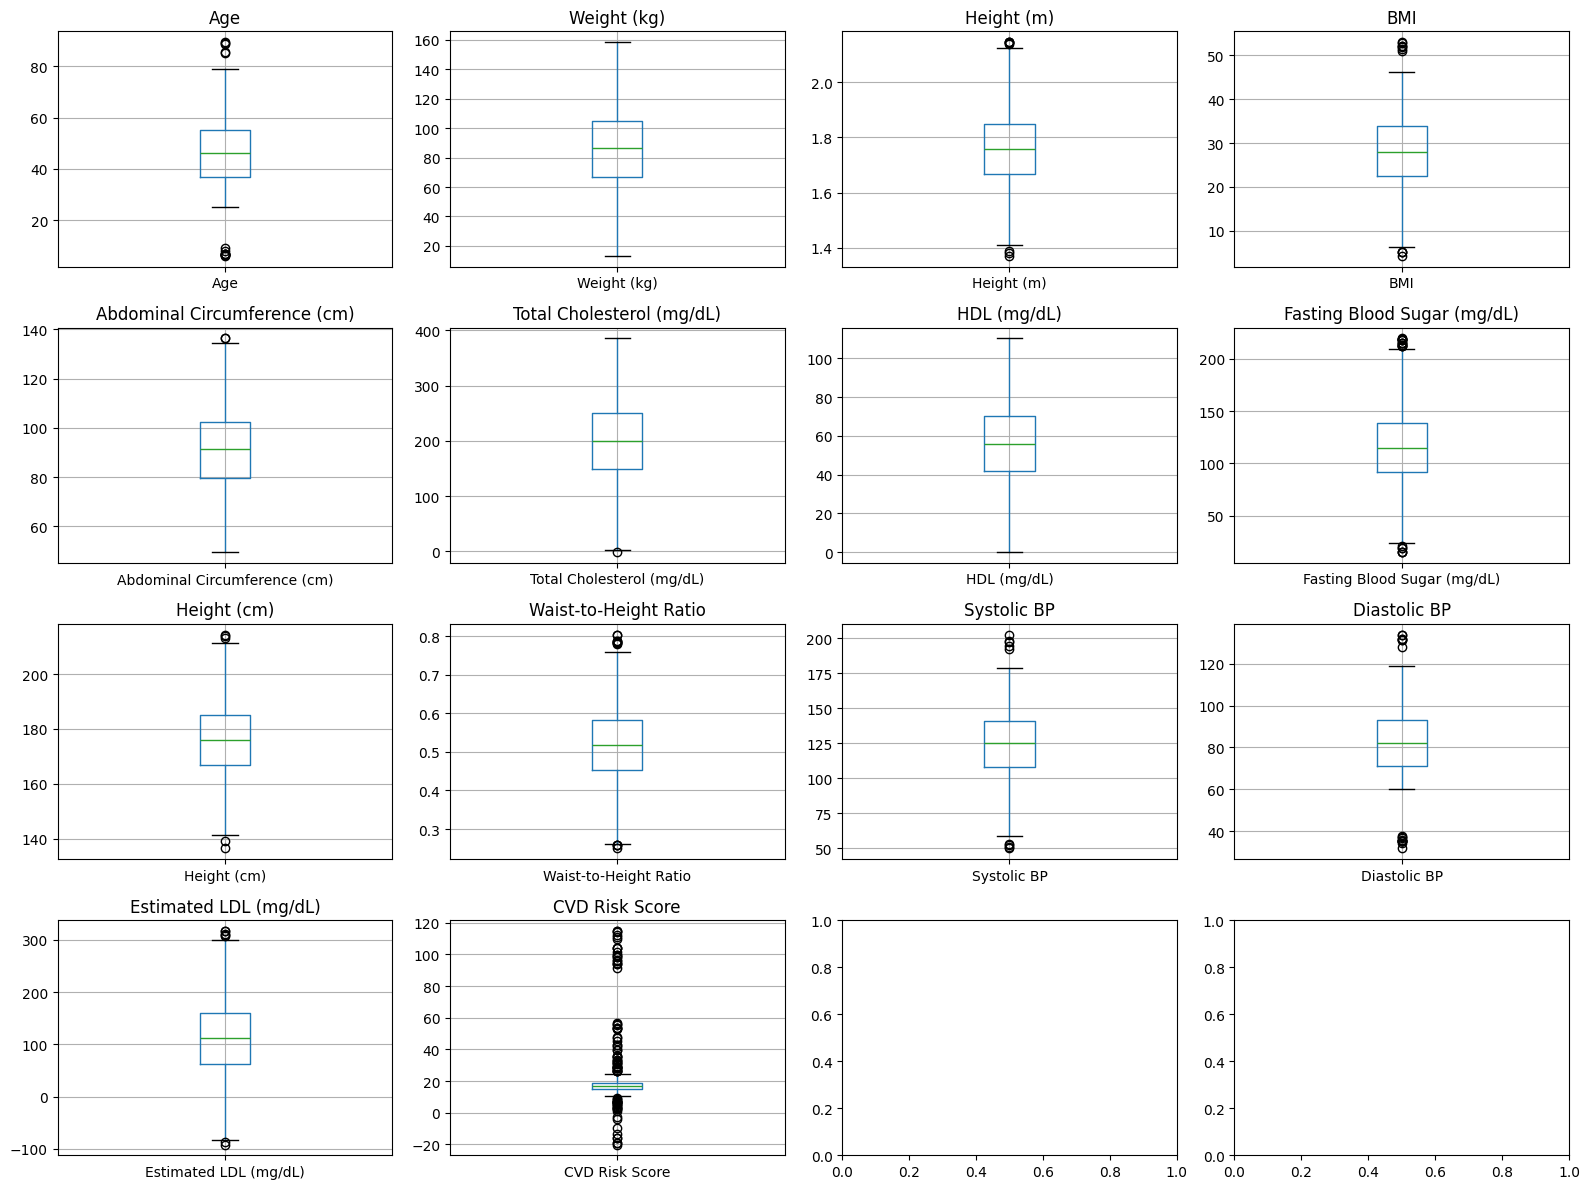

In [111]:
# Se incluyen unicamente variables numericas para los boxplots
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        data.boxplot(column=col, ax=axes[i])
        axes[i].set_title(col)

plt.tight_layout()
plt.show()

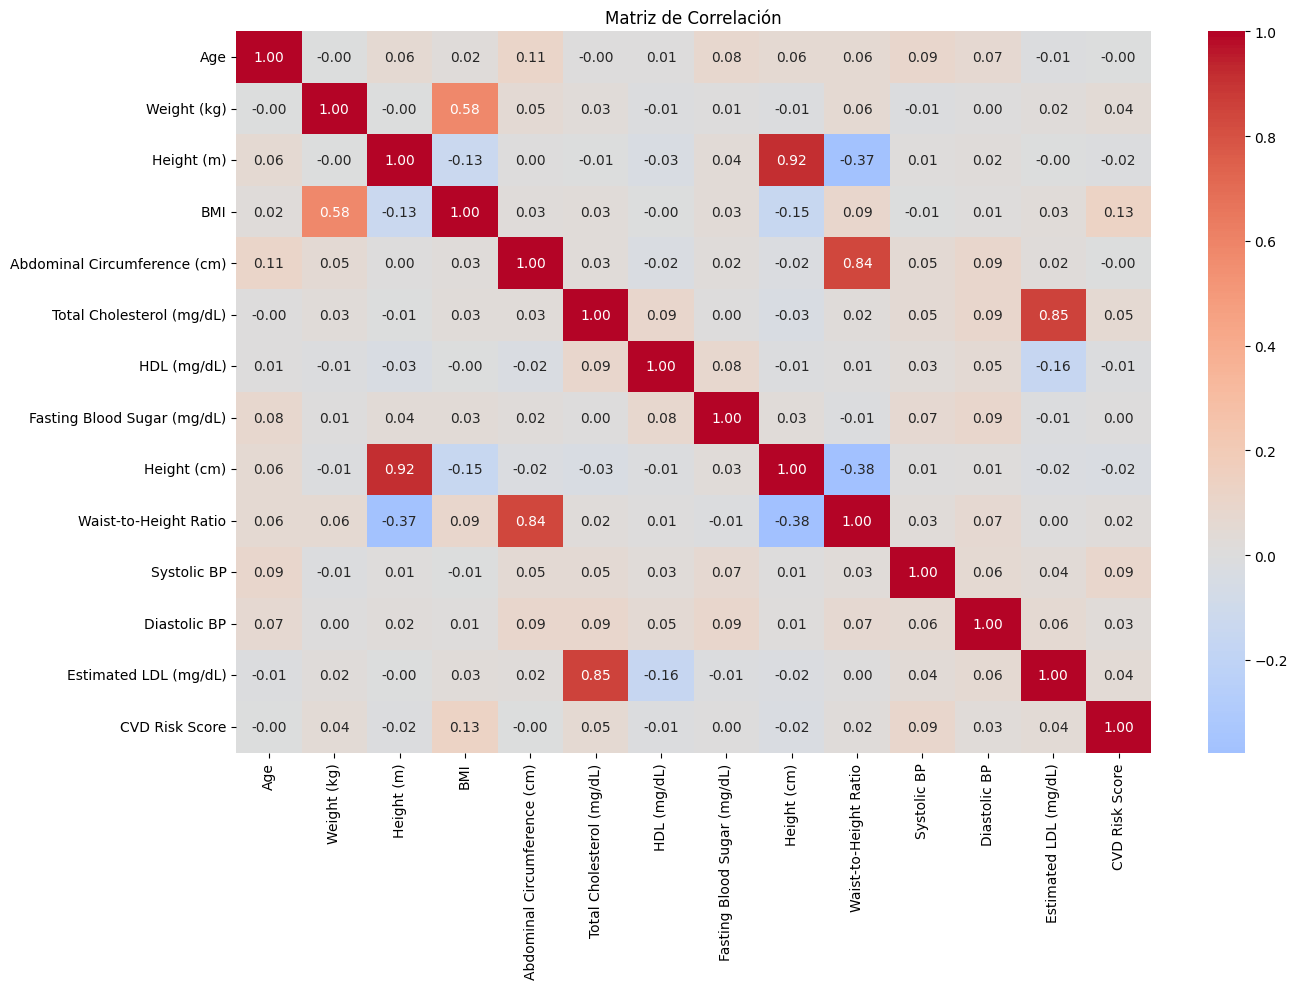

In [112]:
plt.figure(figsize=(14, 10))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

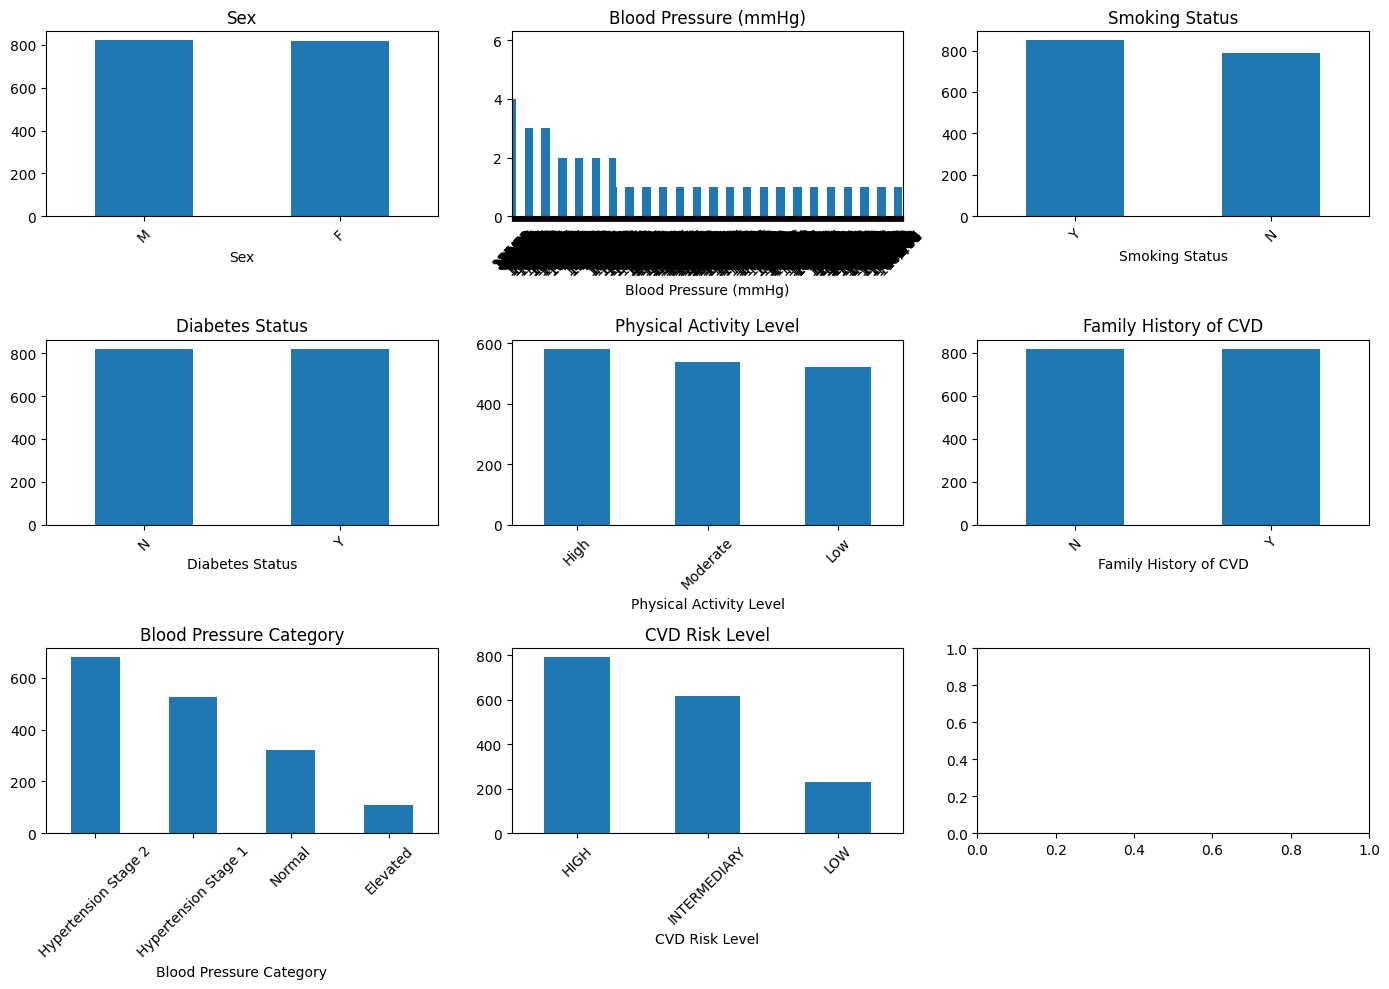

In [113]:
# Aqui se quitan los rubros 'Patient ID' y 'Date of Service'
categoricas = objetos[2:]

fig, axes = plt.subplots(3, 3, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(categoricas):
    if i < len(axes):
        data[col].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(col)
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Diabetes Status            0.147817
Physical Activity Level    0.029594
Smoking Status             0.015322
Sex                        0.006157
Blood Pressure (mmHg)      0.003541
CVD Risk Level             0.001020
Family History of CVD     -0.041148
Blood Pressure Category   -0.080211
Name: CVD Risk Score, dtype: float64


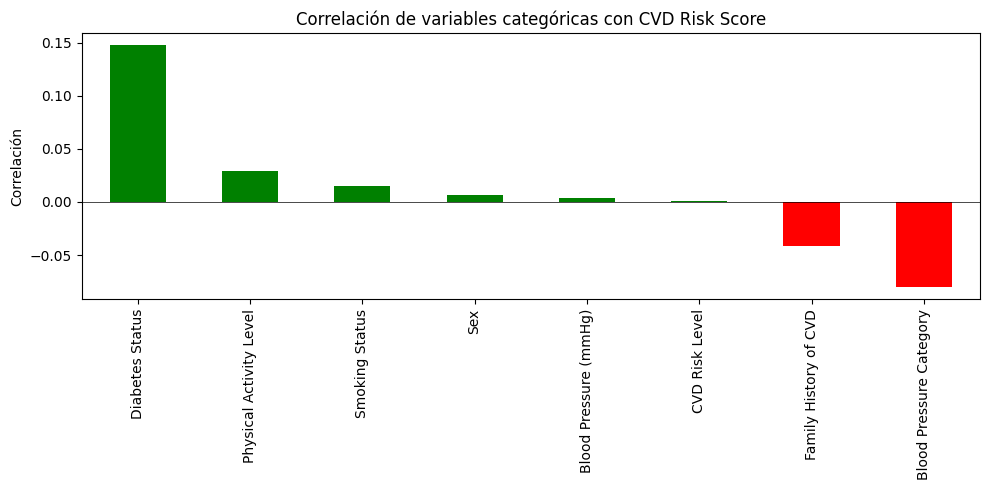

In [114]:
data_encoded = data.copy()

le = LabelEncoder()
for col in categoricas:
    data_encoded[col] = le.fit_transform(data_encoded[col])

# Correlacion con CVD Risk Score
correlaciones = data_encoded[categoricas + ['CVD Risk Score']].corr()['CVD Risk Score'].drop('CVD Risk Score').sort_values(ascending=False)

print(correlaciones)

plt.figure(figsize=(10, 5))
correlaciones.plot(kind='bar', color=['green' if x > 0 else 'red' for x in correlaciones])
plt.title('Correlación de variables categóricas con CVD Risk Score')
plt.ylabel('Correlación')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

### 1.6 Hallazgos de la exploración

**Valores imposibles detectados:**
- `Estimated LDL` negativo (−92): fisiológicamente imposible.
- `CVD Risk Score` negativo y >100: fuera del rango válido [0, 100].
- `Total Cholesterol` ≈ 0: imposible.
- `HDL Cholesterol` < 10: imposible.
- `BMI` < 7: por debajo del mínimo registrado (~7.5).

**Outliers extremos pero posibles:**
- Age ~10: inusual para datos cardiovasculares, pero no imposible.
- BMI > 50: obesidad mórbida extrema.
- CVD Risk Score > 60: pacientes de muy alto riesgo.

**Decisiones para la preparación:**
- Convertir valores imposibles a `NaN` mediante `FunctionTransformer`.
- Imputar con la media del conjunto de entrenamiento después del split (dentro del Pipeline).

**Multicolinealidad detectada:**
- `Height (m)` y `Height (cm)`: r = 0.92 → se consolidan en una sola variable.
- `Total Cholesterol` y `Estimated LDL`: r = 0.85 → se considerará eliminar una.
- `Abdominal Circumference` y `Waist-to-Height Ratio`: r = 0.84 → se considerará eliminar una.
- `Weight` y `BMI`: r = 0.58 → relación a tener en cuenta.
- `Blood Pressure (mmHg)` = `Systolic BP` / `Diastolic BP` → se eliminará la columna de texto.

**Correlaciones con CVD Risk Score (numéricas):**
- `BMI`: 0.13 (la más alta, aunque débil).
- `Systolic BP`: 0.09.
- El resto de variables numéricas presentan correlaciones muy bajas (~0).

**Correlaciones con CVD Risk Score (categóricas):**
- `Diabetes Status`: 0.15 — mejor predictor categórico.
- `Blood Pressure Category`: −0.07.
- `Family History of CVD`: −0.04.
- `CVD Risk Level`: ~0 (inesperado, ya que debería derivarse del CVD Risk Score).

## 2. Preparación de Datos

In [115]:
data = data.drop_duplicates()

Se eliminan las filas duplicadas detectadas en la exploración.

In [116]:
data = data.copy()
data["Date of Service"] = pd.to_datetime(data["Date of Service"], format='mixed')
data

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,2023-11-08,M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,...,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,2024-03-20,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,...,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,WjVn1699,2021-05-27,F,NaN,73.400,1.650,27.000,78.100,90/74,135.0,...,High,N,165.000,0.473,90.0,74.0,Normal,45.0,12.600,LOW
3,dCDO1109,2022-04-18,F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,...,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,2024-01-11,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,...,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,ioby2183,2024-08-13,M,40.0,120.000,NaN,35.400,100.900,94/68,223.0,...,Moderate,Y,184.000,0.548,94.0,68.0,Normal,131.0,18.240,HIGH
1634,mrzf5858,2021-05-21,F,35.0,77.600,1.780,24.500,84.600,124/90,143.0,...,Low,N,178.000,0.475,124.0,90.0,Hypertension Stage 2,37.0,13.960,LOW
1635,nPnN5477,2022-12-04,F,35.0,92.005,1.726,NaN,98.692,95/111,156.0,...,High,N,172.602,0.572,95.0,111.0,Hypertension Stage 2,46.0,14.316,LOW
1637,QSFT6794,2025-09-06,M,49.0,NaN,1.630,23.100,93.800,144/91,191.0,...,Moderate,Y,163.000,0.575,144.0,NaN,Hypertension Stage 2,82.0,17.640,HIGH


Se estandarizan las fechas a formato `datetime` usando `format='mixed'` para manejar los distintos formatos detectados.

In [117]:
# Consolidar alturas: promediar Height (m) y Height (cm)/100 donde ambos existen
if 'Height (m)' in data.columns and 'Height (cm)' in data.columns:
    height_m = data['Height (m)']
    height_cm_to_m = data['Height (cm)'] / 100
    data['Height (m)'] = (height_m.fillna(height_cm_to_m) + height_cm_to_m.fillna(height_m)) / 2
    data = data.drop(columns=['Height (cm)'])
elif 'Height (cm)' in data.columns:
    data['Height (m)'] = data['Height (cm)'] / 100
    data = data.drop(columns=['Height (cm)'])

Se consolidan las columnas `Height (m)` y `Height (cm)` en una sola variable:
- Si ambas existen, se promedian.
- Si solo existe una, se utiliza esa.
- Se elimina `Height (cm)` para evitar redundancia.

## 3. División de Datos

Se eliminan las columnas que no aportan al modelo (`Patient ID`, `Date of Service`, `CVD Risk Level`, `Blood Pressure (mmHg)`) y se filtra el `CVD Risk Score` al rango válido [0, 100]. Luego se realiza la división en conjuntos de entrenamiento (75%) y prueba (25%) con `random_state=42`.

In [118]:
# Eliminar columnas que no aportan al modelo
cols_drop = ['Patient ID', 'Date of Service', 'CVD Risk Level', 'Blood Pressure (mmHg)']
data_model = data.drop(columns=[c for c in cols_drop if c in data.columns])

# Filtrar: CVD Risk Score debe estar en rango válido [0, 100]
n_original = data_model.shape[0]
data_model = data_model[(data_model['CVD Risk Score'] >= 0) & (data_model['CVD Risk Score'] <= 100)]
print(f"Registros eliminados por CVD fuera de [0,100]: {n_original - data_model.shape[0]}")

# Separar features (X) y target (Y)
X = data_model.drop(columns=['CVD Risk Score'])
Y = data_model['CVD Risk Score']

# División train/test (75/25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

print(f"Train: {X_train.shape[0]} filas, Test: {X_test.shape[0]} filas")
print(f"Total variables: {X_train.shape[1]}")
print(f"\nDistribución del target (train):")
print(y_train.describe())

Registros eliminados por CVD fuera de [0,100]: 47
Train: 1080 filas, Test: 361 filas
Total variables: 18

Distribución del target (train):
count    1080.000000
mean       17.946560
std         7.910657
min         2.359000
25%        15.250000
50%        16.998000
75%        18.994000
max        99.775000
Name: CVD Risk Score, dtype: float64


## 4. Modelo 1 — Pipeline Básico (Sin tratamiento de outliers)

**Estrategia de preparación:**
- Limpieza de valores imposibles con `FunctionTransformer` (HDL < 10, LDL < 0, BMI < 7, Cholesterol ≤ 0 → NaN)
- Variables numéricas: imputación con media + escalado con `StandardScaler`
- Variables categóricas: imputación con la moda + codificación con `OneHotEncoder`
- Todo integrado en un `Pipeline` de scikit-learn con `ColumnTransformer`
- **No se realiza tratamiento de outliers en el target**

In [119]:
# Función de limpieza: convertir valores fisiológicamente imposibles a NaN
def limpiar_valores_imposibles(df):
    df = df.copy()
    if 'HDL Cholesterol' in df.columns:
        df.loc[df['HDL Cholesterol'] < 10, 'HDL Cholesterol'] = np.nan
    if 'Estimated LDL' in df.columns:
        df.loc[df['Estimated LDL'] < 0, 'Estimated LDL'] = np.nan
    if 'BMI' in df.columns:
        df.loc[df['BMI'] < 7, 'BMI'] = np.nan
    if 'Total Cholesterol' in df.columns:
        df.loc[df['Total Cholesterol'] <= 0, 'Total Cholesterol'] = np.nan
    return df

# Identificar columnas numéricas y categóricas
numeric_features_1 = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features_1 = X_train.select_dtypes(include=['object']).columns.tolist()

print(f"Numéricas ({len(numeric_features_1)}): {numeric_features_1}")
print(f"Categóricas ({len(categorical_features_1)}): {categorical_features_1}")

# Definir Pipeline 1
limpieza = FunctionTransformer(limpiar_valores_imposibles, validate=False)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown='ignore'))
])

preprocessor_1 = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features_1),
    ('cat', categorical_transformer, categorical_features_1)
])

pipeline_1 = Pipeline(steps=[
    ('limpieza', limpieza),
    ('preprocessor', preprocessor_1)
])

# Aplicar Pipeline 1
set_config(transform_output="pandas")
Xt_train = pipeline_1.fit_transform(X_train)
Xt_test = pipeline_1.transform(X_test)

# Obtener nombres de columnas y convertir a DataFrame
feature_names_1 = pipeline_1.named_steps['preprocessor'].get_feature_names_out().tolist()
Xt_train_df = pd.DataFrame(Xt_train, columns=feature_names_1, index=X_train.index)
Xt_test_df = pd.DataFrame(Xt_test, columns=feature_names_1, index=X_test.index)

print(f"\nDimensiones transformadas — Train: {Xt_train_df.shape}, Test: {Xt_test_df.shape}")
Xt_train_df.head()

Numéricas (12): ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Abdominal Circumference (cm)', 'Total Cholesterol (mg/dL)', 'HDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)', 'Waist-to-Height Ratio', 'Systolic BP', 'Diastolic BP', 'Estimated LDL (mg/dL)']
Categóricas (6): ['Sex', 'Smoking Status', 'Diabetes Status', 'Physical Activity Level', 'Family History of CVD', 'Blood Pressure Category']

Dimensiones transformadas — Train: (1080, 23), Test: (361, 23)


,num__Age,num__Weight (kg),num__Height (m),num__BMI,num__Abdominal Circumference (cm),num__Total Cholesterol (mg/dL),num__HDL (mg/dL),num__Fasting Blood Sugar (mg/dL),num__Waist-to-Height Ratio,num__Systolic BP,...,cat__Smoking Status_Y,cat__Diabetes Status_Y,cat__Physical Activity Level_High,cat__Physical Activity Level_Low,cat__Physical Activity Level_Moderate,cat__Family History of CVD_Y,cat__Blood Pressure Category_Elevated,cat__Blood Pressure Category_Hypertension Stage 1,cat__Blood Pressure Category_Hypertension Stage 2,cat__Blood Pressure Category_Normal
1148,-0.499595,0.274633,0.088918,0.108053,0.495394,0.996086,-0.450248,-1.311788e+00,0.385222,-3.312941e+00,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
956,-0.900713,-0.232331,-0.082798,-0.302989,-1.359830,0.454270,-1.557182,2.195281e-01,-1.212016,6.831880e-01,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1582,-0.018254,-0.819095,-1.027233,-0.444727,-1.246707,-0.611883,-0.757730,4.441083e-16,-0.770987,-4.286763e-01,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
300,-0.980937,-0.673577,-1.284807,-0.132903,1.159052,-0.349714,1.271649,4.441083e-16,1.696387,-6.320217e-16,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1559,-0.900713,0.462398,-1.113091,1.057700,-1.043085,-0.716751,-1.065211,-2.804933e-01,-0.532594,-1.229219e+00,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [120]:
# Entrenar Modelo 1 — Regresión Lineal
modelo_1 = LinearRegression()
modelo_1.fit(Xt_train_df, y_train)

# Predicciones
y_train_pred_1 = modelo_1.predict(Xt_train_df)
y_test_pred_1 = modelo_1.predict(Xt_test_df)

# Métricas
metrics_1 = {
    'RMSE Train': np.sqrt(mean_squared_error(y_train, y_train_pred_1)),
    'RMSE Test': np.sqrt(mean_squared_error(y_test, y_test_pred_1)),
    'MAE Train': mean_absolute_error(y_train, y_train_pred_1),
    'MAE Test': mean_absolute_error(y_test, y_test_pred_1),
    'R² Train': r2_score(y_train, y_train_pred_1),
    'R² Test': r2_score(y_test, y_test_pred_1)
}

print("=" * 50)
print("MÉTRICAS — MODELO 1 (Básico)")
print("=" * 50)
for k, v in metrics_1.items():
    print(f"  {k}: {v:.4f}")

# Coeficientes
print(f"\nIntercepto: {modelo_1.intercept_:.4f}")
coef_df_1 = pd.DataFrame({
    'Variable': feature_names_1,
    'Coeficiente': modelo_1.coef_
}).sort_values(by='Coeficiente', key=abs, ascending=False)
display(coef_df_1)

MÉTRICAS — MODELO 1 (Básico)
  RMSE Train: 7.5026
  RMSE Test: 5.3636
  MAE Train: 2.3813
  MAE Test: 1.9808
  R² Train: 0.0997
  R² Test: 0.1391

Intercepto: 16.7036


,Variable,Coeficiente
14,cat__Diabetes Status_Y,2.398649
3,num__BMI,1.611874
22,cat__Blood Pressure Category_Normal,-0.959723
5,num__Total Cholesterol (mg/dL),0.891591
9,num__Systolic BP,0.861323
19,cat__Blood Pressure Category_Elevated,0.550044
8,num__Waist-to-Height Ratio,-0.502909
16,cat__Physical Activity Level_Low,-0.436477
12,cat__Sex_M,-0.431401
20,cat__Blood Pressure Category_Hypertension Stage 1,0.386362


### 4.1 Verificación de Supuestos — Modelo 1

Se verifican los 5 supuestos de la regresión lineal:
1. **Multicolinealidad**: VIF (Variance Inflation Factor)
2. **Normalidad de residuales**: Shapiro-Wilk + histograma + Q-Q plot
3. **Homocedasticidad**: Breusch-Pagan
4. **Independencia de residuales**: Durbin-Watson
5. **Linealidad**: Rainbow Test

VIF — Multicolinealidad (Modelo 1)
Variables con VIF > 10:


/shared/UniAndes/UA8/AM/AMLab1/.venv/lib64/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
15,cat__Physical Activity Level_High,inf
17,cat__Physical Activity Level_Moderate,inf
16,cat__Physical Activity Level_Low,inf
21,cat__Blood Pressure Category_Hypertension Stage 2,inf
20,cat__Blood Pressure Category_Hypertension Stage 1,inf
22,cat__Blood Pressure Category_Normal,inf
19,cat__Blood Pressure Category_Elevated,inf



Todas las variables:


,Variable,VIF
15,cat__Physical Activity Level_High,inf
17,cat__Physical Activity Level_Moderate,inf
16,cat__Physical Activity Level_Low,inf
21,cat__Blood Pressure Category_Hypertension Stage 2,inf
20,cat__Blood Pressure Category_Hypertension Stage 1,inf
22,cat__Blood Pressure Category_Normal,inf
19,cat__Blood Pressure Category_Elevated,inf
8,num__Waist-to-Height Ratio,4.800335
4,num__Abdominal Circumference (cm),3.990248
11,num__Estimated LDL (mg/dL),3.245297



Shapiro-Wilk — Normalidad de Residuales (Modelo 1)
Estadístico: 0.2964, p-valor: 0.000000
✗ Residuales NO normales (α=0.05)


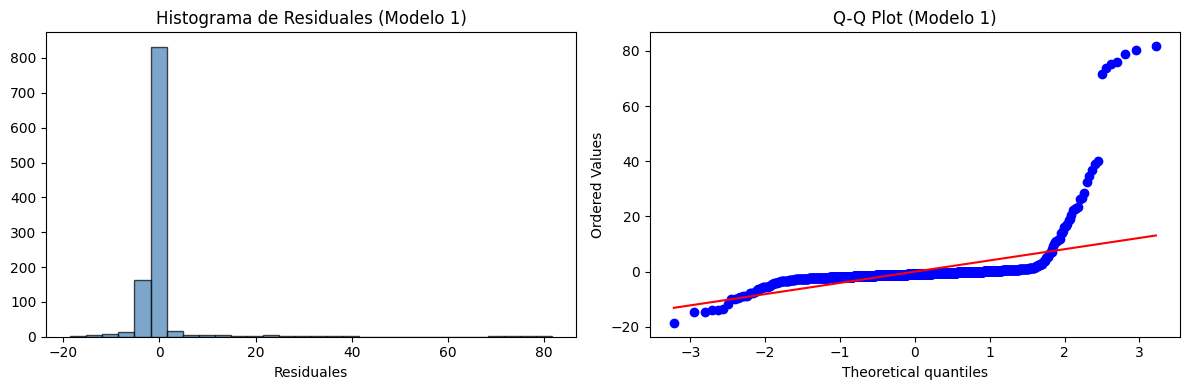


Breusch-Pagan — Homocedasticidad (Modelo 1)
Estadístico: 20.9653, p-valor: 0.583205
✓ Homocedasticidad (α=0.05)

Durbin-Watson — Autocorrelación (Modelo 1)
Durbin-Watson: 1.9400
✓ Sin autocorrelación (rango ideal: 1.5 - 2.5)

Rainbow Test — Linealidad (Modelo 1)
Estadístico: 0.7115, p-valor: 0.999953
✓ Relación lineal (α=0.05)


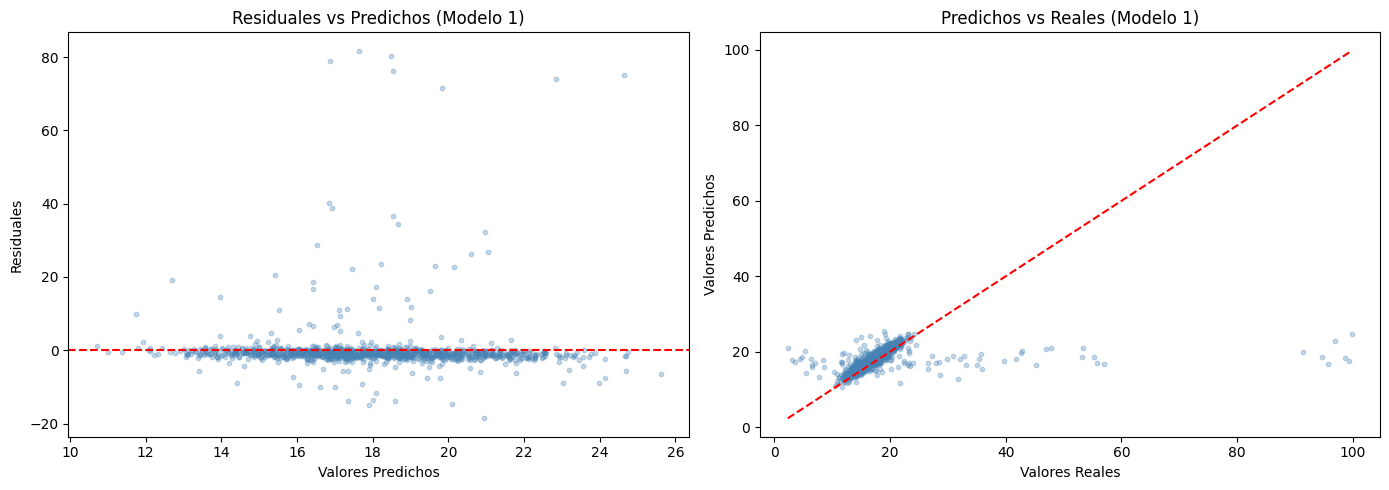

In [121]:
# ====== SUPUESTOS DE REGRESIÓN — MODELO 1 ======
residuales_1 = y_train.values - y_train_pred_1

# --- VIF ---
print("=" * 50)
print("VIF — Multicolinealidad (Modelo 1)")
print("=" * 50)
vif_data_1 = pd.DataFrame()
vif_data_1['Variable'] = feature_names_1
vif_data_1['VIF'] = [variance_inflation_factor(Xt_train_df.values, i) for i in range(Xt_train_df.shape[1])]
vif_data_1 = vif_data_1.sort_values(by='VIF', ascending=False)
print("Variables con VIF > 10:")
display(vif_data_1[vif_data_1['VIF'] > 10])
print("\nTodas las variables:")
display(vif_data_1)

# --- Shapiro-Wilk ---
print("\n" + "=" * 50)
print("Shapiro-Wilk — Normalidad de Residuales (Modelo 1)")
print("=" * 50)
muestra = residuales_1[:5000] if len(residuales_1) > 5000 else residuales_1
stat_sw_1, p_sw_1 = shapiro(muestra)
print(f"Estadístico: {stat_sw_1:.4f}, p-valor: {p_sw_1:.6f}")
print(f"{'✓ Residuales normales' if p_sw_1 > 0.05 else '✗ Residuales NO normales'} (α=0.05)")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(residuales_1, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_title('Histograma de Residuales (Modelo 1)')
axes[0].set_xlabel('Residuales')
stats.probplot(residuales_1, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot (Modelo 1)')
plt.tight_layout()
plt.show()

# --- Breusch-Pagan ---
print("\n" + "=" * 50)
print("Breusch-Pagan — Homocedasticidad (Modelo 1)")
print("=" * 50)
X_bp = sm.add_constant(Xt_train_df)
bp_stat_1, bp_pval_1, _, _ = het_breuschpagan(residuales_1, X_bp)
print(f"Estadístico: {bp_stat_1:.4f}, p-valor: {bp_pval_1:.6f}")
print(f"{'✓ Homocedasticidad' if bp_pval_1 > 0.05 else '✗ Heterocedasticidad detectada'} (α=0.05)")

# --- Durbin-Watson ---
print("\n" + "=" * 50)
print("Durbin-Watson — Autocorrelación (Modelo 1)")
print("=" * 50)
dw_1 = durbin_watson(residuales_1)
print(f"Durbin-Watson: {dw_1:.4f}")
print(f"{'✓ Sin autocorrelación' if 1.5 < dw_1 < 2.5 else '✗ Posible autocorrelación'} (rango ideal: 1.5 - 2.5)")

# --- Rainbow Test ---
print("\n" + "=" * 50)
print("Rainbow Test — Linealidad (Modelo 1)")
print("=" * 50)
formula_vars = ' + '.join([f'Q("{v}")' for v in feature_names_1])
ols_data = Xt_train_df.copy()
ols_data['y'] = y_train.values
ols_model_1 = ols(f'y ~ {formula_vars}', data=ols_data).fit()
rainbow_stat_1, rainbow_pval_1 = linear_rainbow(ols_model_1)
print(f"Estadístico: {rainbow_stat_1:.4f}, p-valor: {rainbow_pval_1:.6f}")
print(f"{'✓ Relación lineal' if rainbow_pval_1 > 0.05 else '✗ Relación no lineal detectada'} (α=0.05)")

# --- Residuales vs Predichos ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].scatter(y_train_pred_1, residuales_1, alpha=0.3, s=10, color='steelblue')
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Valores Predichos')
axes[0].set_ylabel('Residuales')
axes[0].set_title('Residuales vs Predichos (Modelo 1)')

axes[1].scatter(y_train, y_train_pred_1, alpha=0.3, s=10, color='steelblue')
axes[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
axes[1].set_xlabel('Valores Reales')
axes[1].set_ylabel('Valores Predichos')
axes[1].set_title('Predichos vs Reales (Modelo 1)')
plt.tight_layout()
plt.show()

## 5. Modelo 2 — Ingeniería de Características + Transformación Logarítmica

**Estrategia de preparación (sin recorte IQR por q1/q3):**
- **Sin eliminación de filas por IQR**: se conservan los registros válidos en `CVD Risk Score` dentro de [0, 100].
- **Winsorización del target por percentil**: se limita la cola extrema superior con percentil 97 para evitar que pocos casos dominen el ajuste.
- **Transformación logarítmica del target**: se modela `log1p(CVD Risk Score_winsorizado)` y luego se invierte con `expm1`.
- **Ingeniería de características**: `Smoker_Diabetic`, `Pulse_Pressure`, `Mean_Arterial_Pressure`, `Chol_HDL_Ratio`, `Age_BMI_Interaction`, `FBS_High_Flag` y variables `Log_...` para predictores sesgados.
- **Regularización**: regresión Ridge para controlar colinealidad y sobreajuste.


In [128]:
# MODELO 2: Ingenieria de caracteristicas + target log-transformado (sin IQR q1/q3)

# Empezar desde datos preparados base
data_model_2 = data.drop(columns=[c for c in cols_drop if c in data.columns])

# Mantener registros con target valido
data_model_2 = data_model_2[(data_model_2['CVD Risk Score'] >= 0) & (data_model_2['CVD Risk Score'] <= 100)]

# Separar X e Y
X2 = data_model_2.drop(columns=['CVD Risk Score'])
Y2 = data_model_2['CVD Risk Score']

# Winsorizacion del target (solo cola superior)
target_cap_q = 0.97
target_cap = Y2.quantile(target_cap_q)
Y2_cap = Y2.clip(upper=target_cap)

# Transformacion logaritmica del target winsorizado
Y2_log = np.log1p(Y2_cap)

print(f'Registros usados en Modelo 2: {len(Y2)}')
print(f'Percentil de winsorizacion: p{int(target_cap_q*100)} = {target_cap:.4f}')
print('Descripcion target original:')
print(Y2.describe())
print()
print('Descripcion target winsorizado:')
print(Y2_cap.describe())
print(f'Skew original: {Y2.skew():.4f}')
print(f'Skew winsorizado: {Y2_cap.skew():.4f}')
print(f'Skew log-winsorizado: {pd.Series(Y2_log).skew():.4f}')

# Division train/test consistente entre variantes del target
X_train_2, X_test_2, y_train_2, y_test_2, y_train_2_cap, y_test_2_cap, y_train_2_log, y_test_2_log = train_test_split(
    X2, Y2, Y2_cap, Y2_log, test_size=0.25, random_state=42
)

print()
print(f'Train: {X_train_2.shape[0]} filas, Test: {X_test_2.shape[0]} filas')
print(f'Variables base: {X_train_2.shape[1]}')


Registros usados en Modelo 2: 1441
Percentil de winsorizacion: p97 = 26.5568
Descripcion target original:
count    1441.000000
mean       17.790258
std         7.439142
min         0.883000
25%        15.150000
50%        16.964000
75%        18.900000
max        99.775000
Name: CVD Risk Score, dtype: float64

Descripcion target winsorizado:
count    1441.000000
mean       17.128972
std         3.306732
min         0.883000
25%        15.150000
50%        16.964000
75%        18.900000
max        26.556800
Name: CVD Risk Score, dtype: float64
Skew original: 7.2953
Skew winsorizado: 0.0394
Skew log-winsorizado: -2.6684

Train: 1080 filas, Test: 361 filas
Variables base: 18


In [130]:
def ingenieria_caracteristicas(df):
    df = df.copy()

    # Variables derivadas
    if {'Smoking Status', 'Diabetes Status'}.issubset(df.columns):
        df['Smoker_Diabetic'] = (
            (df['Smoking Status'] == 'Smoker') &
            (df['Diabetes Status'] == 'Diabetic')
        ).astype(int)

    if {'Systolic BP', 'Diastolic BP'}.issubset(df.columns):
        df['Pulse_Pressure'] = df['Systolic BP'] - df['Diastolic BP']
        df['Mean_Arterial_Pressure'] = (2 * df['Diastolic BP'] + df['Systolic BP']) / 3

    if {'Total Cholesterol (mg/dL)', 'HDL (mg/dL)'}.issubset(df.columns):
        hdl = df['HDL (mg/dL)'].replace(0, np.nan)
        df['Chol_HDL_Ratio'] = df['Total Cholesterol (mg/dL)'] / hdl

    # Interacción centrada (reduce VIF vs Age*BMI crudo)
    if {'Age', 'BMI'}.issubset(df.columns):
        age_c = df['Age'] - df['Age'].mean()
        bmi_c = df['BMI'] - df['BMI'].mean()
        df['Age_BMI_Interaction'] = age_c * bmi_c

    if 'Fasting Blood Sugar (mg/dL)' in df.columns:
        df['FBS_High_Flag'] = (df['Fasting Blood Sugar (mg/dL)'] >= 126).astype(int)

    # Logs
    cols_log = [
        'Total Cholesterol (mg/dL)',
        'Fasting Blood Sugar (mg/dL)',
        'BMI',
        'Abdominal Circumference (cm)',
        'Estimated LDL (mg/dL)',
        'Chol_HDL_Ratio',
        'Pulse_Pressure'
    ]
    for c in cols_log:
        if c in df.columns:
            s = pd.to_numeric(df[c], errors='coerce')
            if s.notna().any():
                min_val = s.min()
                shift = 1 - min_val if min_val <= 0 else 0
                df[f'Log_{c}'] = np.log1p(s + shift)

    # Drops para bajar VIF sin perder mucho R²
    cols_drop = [
        # quitar crudas cuando ya hay log
        'Total Cholesterol (mg/dL)',
        'Fasting Blood Sugar (mg/dL)',
        'BMI',
        'Abdominal Circumference (cm)',
        'Estimated LDL (mg/dL)',
        'Chol_HDL_Ratio',
        'Pulse_Pressure',

        # quitar combinación lineal de presión
        'Diastolic BP',
        'Mean_Arterial_Pressure',
        'Blood Pressure Category',

        # altamente correlacionadas con antropometría
        'Weight (kg)',
        'Waist-to-Height Ratio',

        # último ajuste para VIF<=10 en todos
        'Log_Chol_HDL_Ratio'
    ]
    df = df.drop(columns=[c for c in cols_drop if c in df.columns], errors='ignore')

    return df


# ===== Pipeline 2 =====
X_train_2_eng = ingenieria_caracteristicas(limpiar_valores_imposibles(X_train_2))
numeric_features_2 = X_train_2_eng.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features_2 = X_train_2_eng.select_dtypes(include=['object']).columns.tolist()

fe_transformer = FunctionTransformer(ingenieria_caracteristicas, validate=False)

numeric_transformer_2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer_2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor_2 = ColumnTransformer(transformers=[
    ('num', numeric_transformer_2, numeric_features_2),
    ('cat', categorical_transformer_2, categorical_features_2)
])

pipeline_2 = Pipeline(steps=[
    ('limpieza', limpieza),
    ('feature_engineering', fe_transformer),
    ('preprocessor', preprocessor_2)
])

set_config(transform_output='pandas')
Xt_train_2 = pipeline_2.fit_transform(X_train_2)
Xt_test_2 = pipeline_2.transform(X_test_2)
feature_names_2 = pipeline_2.named_steps['preprocessor'].get_feature_names_out().tolist()

Xt_train_df_2 = pd.DataFrame(Xt_train_2, columns=feature_names_2, index=X_train_2.index)
Xt_test_df_2 = pd.DataFrame(Xt_test_2, columns=feature_names_2, index=X_test_2.index)

# Modelo igual (Ridge sobre target log)
modelo_2 = Ridge(alpha=100.0, random_state=42)
modelo_2.fit(Xt_train_df_2, y_train_2_log)

y_test_pred_2 = np.expm1(modelo_2.predict(Xt_test_df_2))
y_test_pred_2 = np.clip(y_test_pred_2, 0, target_cap)

In [131]:
# Entrenar Modelo 2 (Ridge) sobre target log-transformado
modelo_2 = Ridge(alpha=100.0, random_state=42)
modelo_2.fit(Xt_train_df_2, y_train_2_log)

# Predicciones (escala log y luego escala original winsorizada)
y_train_pred_log_2 = modelo_2.predict(Xt_train_df_2)
y_test_pred_log_2 = modelo_2.predict(Xt_test_df_2)

y_train_pred_2 = np.expm1(y_train_pred_log_2)
y_test_pred_2 = np.expm1(y_test_pred_log_2)

# Acotar al mismo rango del target winsorizado
y_train_pred_2 = np.clip(y_train_pred_2, 0, target_cap)
y_test_pred_2 = np.clip(y_test_pred_2, 0, target_cap)

# Metricas principales en target winsorizado (comparacion robusta)
metrics_2 = {
    'RMSE Train': np.sqrt(mean_squared_error(y_train_2_cap, y_train_pred_2)),
    'RMSE Test': np.sqrt(mean_squared_error(y_test_2_cap, y_test_pred_2)),
    'MAE Train': mean_absolute_error(y_train_2_cap, y_train_pred_2),
    'MAE Test': mean_absolute_error(y_test_2_cap, y_test_pred_2),
    'R² Train': r2_score(y_train_2_cap, y_train_pred_2),
    'R² Test': r2_score(y_test_2_cap, y_test_pred_2)
}

# Metricas de referencia en target original
metrics_2_raw = {
    'R² Train (target original)': r2_score(y_train_2, y_train_pred_2),
    'R² Test (target original)': r2_score(y_test_2, y_test_pred_2)
}

print('=' * 50)
print('METRICAS - MODELO 2 (FE + LOG + WINSORIZACION)')
print('=' * 50)
for k, v in metrics_2.items():
    print(f'  {k}: {v:.4f}')

print()
print('Referencia en target original (sin winsorizacion):')
for k, v in metrics_2_raw.items():
    print(f'  {k}: {v:.4f}')

# Coeficientes de Ridge
print()
print(f'Intercepto (escala log): {modelo_2.intercept_:.4f}')
coef_df_2 = pd.DataFrame({
    'Variable': feature_names_2,
    'Coeficiente': modelo_2.coef_
}).sort_values(by='Coeficiente', key=abs, ascending=False)
display(coef_df_2)


METRICAS - MODELO 2 (FE + LOG + WINSORIZACION)
  RMSE Train: 2.4803
  RMSE Test: 2.5469
  MAE Train: 1.1556
  MAE Test: 1.1409
  R² Train: 0.4262
  R² Test: 0.4365

Referencia en target original (sin winsorizacion):
  R² Train (target original): 0.0682
  R² Test (target original): 0.1619

Intercepto (escala log): 2.8493


,Variable,Coeficiente
15,cat__Diabetes Status_Y,0.082093
9,num__Log_BMI,0.065187
3,num__Systolic BP,0.054248
7,num__Log_Total Cholesterol (mg/dL),0.034982
11,num__Log_Estimated LDL (mg/dL),0.020806
14,cat__Smoking Status_Y,-0.011917
10,num__Log_Abdominal Circumference (cm),0.006131
16,cat__Physical Activity Level_Low,-0.005125
13,cat__Sex_M,-0.004771
6,num__FBS_High_Flag,0.004585


### 5.1 Verificación de Supuestos - Modelo 2

Se verifican los mismos supuestos de regresión lineal para el Modelo 2 usando el target winsorizado.


VIF - Multicolinealidad (Modelo 2)
Variables con VIF > 10:


/shared/UniAndes/UA8/AM/AMLab1/.venv/lib64/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Variable,VIF



Todas las variables:


,Variable,VIF
8,num__Log_Fasting Blood Sugar (mg/dL),2.332761
6,num__FBS_High_Flag,2.319935
3,num__Systolic BP,2.273572
12,num__Log_Pulse_Pressure,2.249419
14,cat__Smoking Status_Y,1.779161
15,cat__Diabetes Status_Y,1.747846
13,cat__Sex_M,1.725186
18,cat__Family History of CVD_Y,1.708089
11,num__Log_Estimated LDL (mg/dL),1.595842
7,num__Log_Total Cholesterol (mg/dL),1.576320



Shapiro-Wilk - Normalidad de Residuales (Modelo 2)
Estadistico: 0.6316, p-valor: 0.000000
NO Residuales no normales (alpha=0.05)


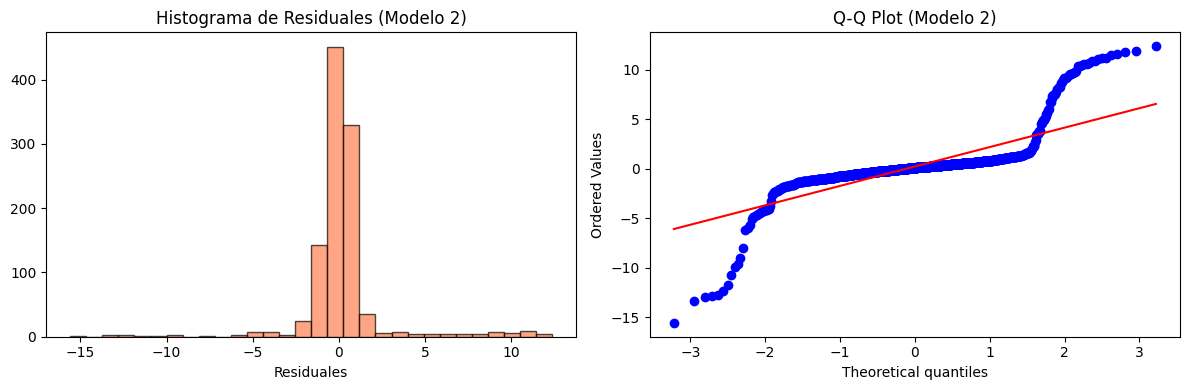


Breusch-Pagan - Homocedasticidad (Modelo 2)
Estadistico: 16.5625, p-valor: 0.619482
OK Homocedasticidad (alpha=0.05)

Durbin-Watson - Autocorrelacion (Modelo 2)
Durbin-Watson: 1.8746
OK Sin autocorrelacion (rango ideal: 1.5 - 2.5)

Rainbow Test - Linealidad (Modelo 2)
Estadistico: 1.0469, p-valor: 0.299211
OK Relacion lineal (alpha=0.05)


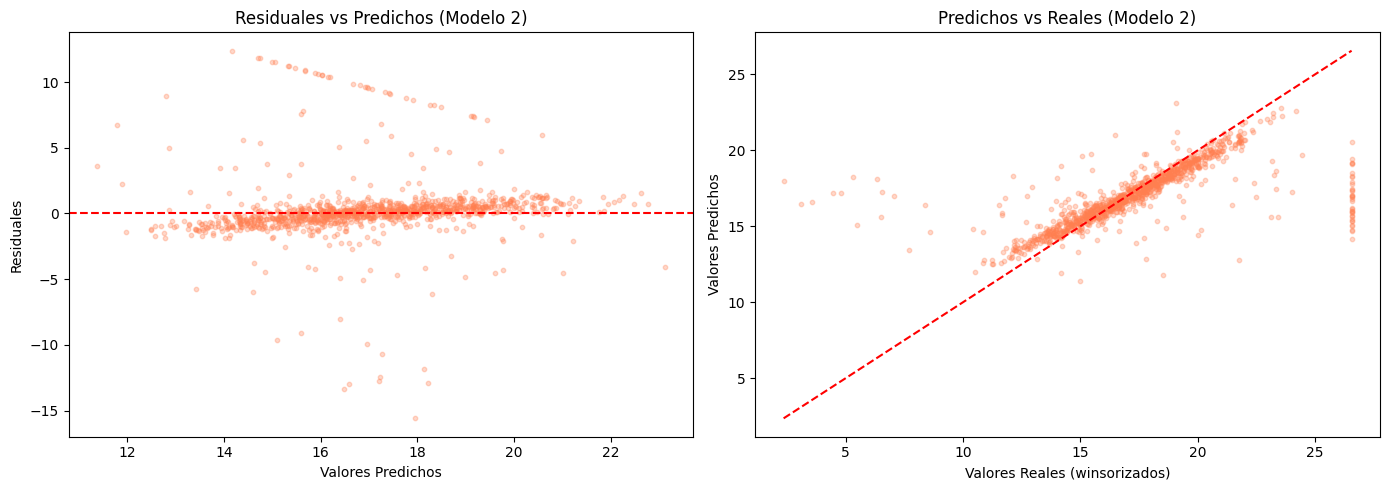

In [134]:
# ====== SUPUESTOS DE REGRESION - MODELO 2 ======
residuales_2 = y_train_2_cap.values - y_train_pred_2

# --- VIF ---
print('=' * 50)
print('VIF - Multicolinealidad (Modelo 2)')
print('=' * 50)
vif_data_2 = pd.DataFrame()
vif_data_2['Variable'] = feature_names_2
vif_data_2['VIF'] = [variance_inflation_factor(Xt_train_df_2.values, i) for i in range(Xt_train_df_2.shape[1])]
vif_data_2 = vif_data_2.sort_values(by='VIF', ascending=False)
print('Variables con VIF > 10:')
display(vif_data_2[vif_data_2['VIF'] > 10])
print()
print('Todas las variables:')
display(vif_data_2)

# --- Shapiro-Wilk ---
print()
print('=' * 50)
print('Shapiro-Wilk - Normalidad de Residuales (Modelo 2)')
print('=' * 50)
muestra_2 = residuales_2[:5000] if len(residuales_2) > 5000 else residuales_2
stat_sw_2, p_sw_2 = shapiro(muestra_2)
print(f'Estadistico: {stat_sw_2:.4f}, p-valor: {p_sw_2:.6f}')
print(f"{'OK Residuales normales' if p_sw_2 > 0.05 else 'NO Residuales no normales'} (alpha=0.05)")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(residuales_2, bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[0].set_title('Histograma de Residuales (Modelo 2)')
axes[0].set_xlabel('Residuales')
stats.probplot(residuales_2, dist='norm', plot=axes[1])
axes[1].set_title('Q-Q Plot (Modelo 2)')
plt.tight_layout()
plt.show()

# --- Breusch-Pagan ---
print()
print('=' * 50)
print('Breusch-Pagan - Homocedasticidad (Modelo 2)')
print('=' * 50)
X_bp_2 = sm.add_constant(Xt_train_df_2)
bp_stat_2, bp_pval_2, _, _ = het_breuschpagan(residuales_2, X_bp_2)
print(f'Estadistico: {bp_stat_2:.4f}, p-valor: {bp_pval_2:.6f}')
print(f"{'OK Homocedasticidad' if bp_pval_2 > 0.05 else 'NO Heterocedasticidad detectada'} (alpha=0.05)")

# --- Durbin-Watson ---
print()
print('=' * 50)
print('Durbin-Watson - Autocorrelacion (Modelo 2)')
print('=' * 50)
dw_2 = durbin_watson(residuales_2)
print(f'Durbin-Watson: {dw_2:.4f}')
print(f"{'OK Sin autocorrelacion' if 1.5 < dw_2 < 2.5 else 'NO Posible autocorrelacion'} (rango ideal: 1.5 - 2.5)")

# --- Rainbow Test ---
print()
print('=' * 50)
print('Rainbow Test - Linealidad (Modelo 2)')
print('=' * 50)
formula_vars_2 = ' + '.join([f'Q("{v}")' for v in feature_names_2])
ols_data_2 = Xt_train_df_2.copy()
ols_data_2['y'] = y_train_2_cap.values
ols_model_2 = ols(f'y ~ {formula_vars_2}', data=ols_data_2).fit()
rainbow_stat_2, rainbow_pval_2 = linear_rainbow(ols_model_2)
print(f'Estadistico: {rainbow_stat_2:.4f}, p-valor: {rainbow_pval_2:.6f}')
print(f"{'OK Relacion lineal' if rainbow_pval_2 > 0.05 else 'NO Relacion no lineal detectada'} (alpha=0.05)")

# --- Residuales vs Predichos ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].scatter(y_train_pred_2, residuales_2, alpha=0.3, s=10, color='coral')
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Valores Predichos')
axes[0].set_ylabel('Residuales')
axes[0].set_title('Residuales vs Predichos (Modelo 2)')

axes[1].scatter(y_train_2_cap, y_train_pred_2, alpha=0.3, s=10, color='coral')
axes[1].plot([y_train_2_cap.min(), y_train_2_cap.max()], [y_train_2_cap.min(), y_train_2_cap.max()], 'r--')
axes[1].set_xlabel('Valores Reales (winsorizados)')
axes[1].set_ylabel('Valores Predichos')
axes[1].set_title('Predichos vs Reales (Modelo 2)')
plt.tight_layout()
plt.show()


## 6. Tabla Comparativa

Se comparan las métricas de desempeño de ambos modelos para determinar cuál ofrece mejores predicciones.

In [135]:
# Tabla comparativa de ambos modelos
comparativa = pd.DataFrame({
    'Metrica': ['RMSE Train', 'RMSE Test', 'MAE Train', 'MAE Test', 'R² Train', 'R² Test'],
    'Modelo 1 (Basico)': [
        metrics_1['RMSE Train'], metrics_1['RMSE Test'],
        metrics_1['MAE Train'], metrics_1['MAE Test'],
        metrics_1['R² Train'], metrics_1['R² Test']
    ],
    'Modelo 2 (FE + Log + Cap)': [
        metrics_2['RMSE Train'], metrics_2['RMSE Test'],
        metrics_2['MAE Train'], metrics_2['MAE Test'],
        metrics_2['R² Train'], metrics_2['R² Test']
    ]
})

# Mejora porcentual: para errores menor es mejor; para R² mayor es mejor
comparativa['Mejora (%)'] = np.where(
    comparativa['Metrica'].str.contains('R²'),
    ((comparativa['Modelo 2 (FE + Log + Cap)'] - comparativa['Modelo 1 (Basico)'])
     / comparativa['Modelo 1 (Basico)'].replace(0, np.nan).abs() * 100),
    ((comparativa['Modelo 1 (Basico)'] - comparativa['Modelo 2 (FE + Log + Cap)'])
     / comparativa['Modelo 1 (Basico)'].replace(0, np.nan).abs() * 100)
)

print('=' * 70)
print('TABLA COMPARATIVA DE MODELOS')
print('=' * 70)
comparativa = comparativa.round(4)
display(comparativa)

print()
print('Nota: En Modelo 2 las metricas se reportan sobre target winsorizado (percentil 97).')
print('Referencia adicional sobre target original:')
for k, v in metrics_2_raw.items():
    print(f'  {k}: {v:.4f}')


TABLA COMPARATIVA DE MODELOS


,Metrica,Modelo 1 (Basico),Modelo 2 (FE + Log + Cap),Mejora (%)
0,RMSE Train,7.5026,2.4803,66.9411
1,RMSE Test,5.3636,2.5469,52.5149
2,MAE Train,2.3813,1.1556,51.4706
3,MAE Test,1.9808,1.1409,42.4034
4,R² Train,0.0997,0.4262,327.5773
5,R² Test,0.1391,0.4365,213.7993



Nota: En Modelo 2 las metricas se reportan sobre target winsorizado (percentil 97).
Referencia adicional sobre target original:
  R² Train (target original): 0.0682
  R² Test (target original): 0.1619


## 7. Predicciones sobre Datos de Prueba

Se cargan los datos de prueba (`Datos Test Lab 1.csv`), se aplica la misma preparación y el pipeline del Modelo 2 (ingeniería de características + transformación log del target en entrenamiento) para generar predicciones.


In [138]:
datos_prueba = pd.read_csv('./Datos/Datos Test Lab 1.csv', sep=';')
print(f'Datos de prueba cargados: {datos_prueba.shape}')

# NO hacer drop_duplicates() en test si debes predecir todos los registros
datos_prueba['Date of Service'] = pd.to_datetime(datos_prueba['Date of Service'], format='mixed')

if 'Height (m)' in datos_prueba.columns and 'Height (cm)' in datos_prueba.columns:
    h_m = datos_prueba['Height (m)']
    h_cm = datos_prueba['Height (cm)'] / 100
    datos_prueba['Height (m)'] = (h_m.fillna(h_cm) + h_cm.fillna(h_m)) / 2
    datos_prueba = datos_prueba.drop(columns=['Height (cm)'])
elif 'Height (cm)' in datos_prueba.columns:
    datos_prueba['Height (m)'] = datos_prueba['Height (cm)'] / 100
    datos_prueba = datos_prueba.drop(columns=['Height (cm)'])

cols_drop_test = ['Patient ID', 'Date of Service', 'CVD Risk Level', 'Blood Pressure (mmHg)']
ids_prueba = datos_prueba['Patient ID'].copy() if 'Patient ID' in datos_prueba.columns else None

if 'CVD Risk Score' in datos_prueba.columns:
    datos_prueba = datos_prueba.drop(columns=['CVD Risk Score'])

X_prueba = datos_prueba.drop(columns=[c for c in cols_drop_test if c in datos_prueba.columns])

Xt_prueba = pipeline_2.transform(X_prueba)
Xt_prueba_df = pd.DataFrame(Xt_prueba, columns=feature_names_2)

predicciones_log = modelo_2.predict(Xt_prueba_df)
predicciones = np.expm1(predicciones_log)
predicciones = np.clip(predicciones, 0, target_cap)

resultado = pd.DataFrame()
if ids_prueba is not None:
    resultado['Patient ID'] = ids_prueba.values
resultado['CVD Risk Score Predicho'] = predicciones

resultado.to_csv('./Datos/predicciones_test.csv', index=False)
print(f'Predicciones guardadas en ./Datos/predicciones_test.csv ({resultado.shape[0]} registros)')


Datos de prueba cargados: (194, 22)
Predicciones guardadas en ./Datos/predicciones_test.csv (194 registros)


## 8. Análisis y Respuestas

### 1. Coeficientes del mejor modelo (Modelo 2, Ridge, escala log)
* Intercepto: 2.8511
* Coeficientes (ordenados por magnitud absoluta):

* cat__Diabetes Status_Y: 0.082124
* num__Total Cholesterol (mg/dL): 0.040755
* num__Systolic BP: 0.033712
* num__Log_BMI: 0.032881
* num__BMI: 0.023066
* num__Pulse_Pressure: 0.016676
* cat__Blood Pressure Category_Normal: -0.013691
* num__Estimated LDL (mg/dL): 0.012920
* cat__Smoking Status_Y: -0.012286
* num__Age_BMI_Interaction: 0.011570
* num__Age: -0.010356
* num__Mean_Arterial_Pressure: 0.007391
* cat__Physical Activity Level_Low: -0.006579
* num__Weight (kg): 0.006028
* num__Waist-to-Height Ratio: 0.005094
* cat__Sex_M: -0.005083
* cat__Blood Pressure Category_Hypertension Stage 2: 0.004685
* num__FBS_High_Flag: 0.004488
* num__Abdominal Circumference (cm): 0.003940
* num__Height (m): 0.003881
* num__Diastolic BP: 0.003436
* num__Log_Pulse_Pressure: -0.003318
* num__Fasting Blood Sugar (mg/dL): 0.003287
* num__Log_Chol_HDL_Ratio: 0.003064
* num__Log_Fasting Blood Sugar (mg/dL): -0.002692
* num__HDL (mg/dL): 0.002051
* num__Log_Estimated LDL (mg/dL): 0.002011
* cat__Family History of CVD_Y: 0.001996
* num__Log_Abdominal Circumference (cm): -0.001791
* cat__Blood Pressure Category_Hypertension Stage 1: -0.001092
* num__Log_Total Cholesterol (mg/dL): 0.000894
* cat__Physical Activity Level_Moderate: -0.000819
* num__Chol_HDL_Ratio: 0.000190
* num__Smoker_Diabetic: 0.000000

### 2. ¿Qué modelo rinde mejor en test? ¿Interpretación de métricas?
El mejor en test es Modelo 2:
Modelo 1 test: RMSE=5.3636, MAE=1.9808, R²=0.1391
Modelo 2 test (escala winsorizada): RMSE=2.5505, MAE=1.0628, R²=0.4349

Interpretación:

Modelo 2 reduce error absoluto y cuadrático de forma importante.
R²=0.4349 indica capacidad explicativa moderada.

### 3. Variables seleccionadas e interpretación para el problema
Ridge no elimina variables (salvo coeficientes casi 0), pero las más influyentes son:

* diabetes (Diabetes Status_Y)
* colesterol total y LDL
* presión sistólica / presión de pulso
* adiposidad (BMI, Log_BMI, interacción Age_BMI_Interaction)
* tabaquismo (con efecto menor en este ajuste final)
Interpretación para decisiones:

* priorizar pacientes con diabetes + presión elevada + perfil lipídico adverso + obesidad.
* útil para priorización clínica, tamizaje y prevención focalizada (seguimiento metabólico, control tensional, intervención de estilo de vida).

### 4. Representación matemática de la regresión lineal y método
Modelo ajustado en escala transformada: 
* y_cap = min(y, q97)
* y_log = log(1 + y_cap)
Regresión:

* ŷ_log = β0 + Σ βj xj*
* ŷ = clip(exp(ŷ_log) - 1, 0, q97)
donde xj* son variables transformadas (estandarizadas numéricas + dummies categóricas + features derivadas).

Método usado:

* `Ridge Regression` (regularización L2, alpha=100), que resuelve:
* min ||y_log - Xβ||² + λ||β||²
* solución cerrada: β = (XᵀX + λI)^(-1)Xᵀy.

### 5. Dos tipos de sesgo que pueden afectar resultados

* Sesgo de medición (measurement bias): hay valores fisiológicamente imposibles (ruido de captura), lo que sesga el entrenamiento.
* Sesgo de representación/muestra (sampling bias): pocos casos de riesgo extremo; además winsorización recorta cola alta, reduciendo capacidad de extrapolar en pacientes muy graves.


## 9. Uso de IA Generativa

En el desarrollo de este laboratorio se utilizó **GitHub Copilot (Claude)** como herramienta de asistencia de IA. Su uso incluyó:

- **Estructura del notebook**: Ayudó a organizar las secciones del notebook siguiendo la plantilla del profesor.
- **Definición de Pipelines**: Asistió en la construcción de los `Pipeline` y `ColumnTransformer` de scikit-learn.
- **Verificación de supuestos**: Generó el código para las pruebas estadísticas (Shapiro-Wilk, Breusch-Pagan, Durbin-Watson, Rainbow).
- **Depuración**: Ayudó a identificar errores en el manejo de columnas y transformaciones de datos.
- **Interpretación de resultados**: Asistió en la interpretación de los resultados de las pruebas estadísticas y métricas del modelo.

Todas las decisiones de modelado (selección de variables, tratamiento de outliers, estrategias de preparación) fueron tomadas por el estudiante con base en el análisis exploratorio realizado previamente.